## Fraud Detection

### Import libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [2]:
data=pd.read_csv("Downloads/Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Data cleaning

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.duplicated().sum()

0

###### The data is well cleaned and does not have any null or duplicate data

In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

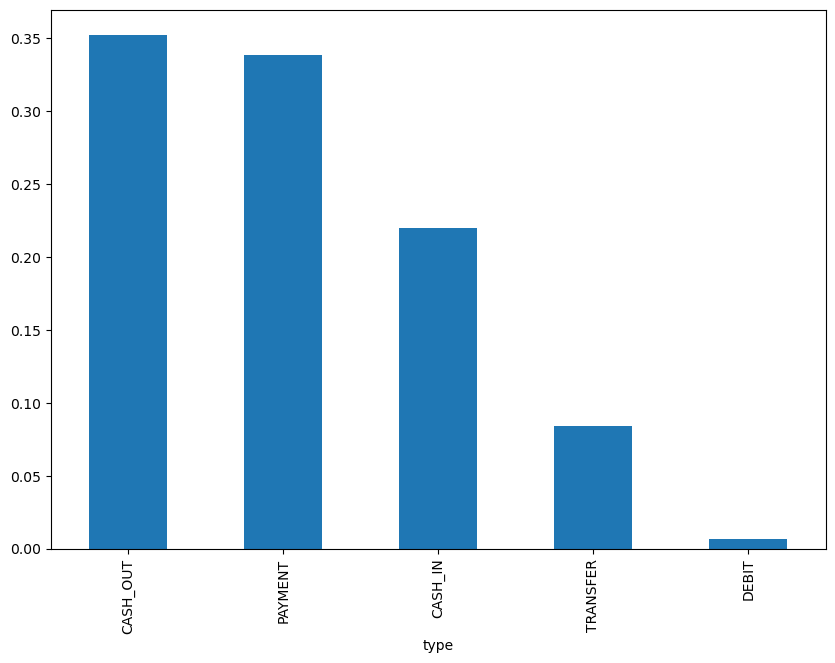

In [9]:
fig = plt.figure(figsize =(10, 7))
data['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Droping unnecessery data columns

In [10]:
data.drop(['isFlaggedFraud','nameOrig','nameDest','step'], axis = 1, inplace = True)

To optimize the model's performance, I conducted a correlation analysis on all features. This analysis revealed a high degree of correlation between certain features. To avoid multicollinearity, which can negatively impact model accuracy, I decided to remove list of column names from the dataset. This ensures the remaining features provide independent and informative contributions to the mode

### Convert categorical  into numerical

In [11]:
data['type'] = data['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [12]:
data.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.055307e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,9.808966e-01,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,5.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


### Splitting data into Target

In [13]:
x = data.drop(['isFraud'], axis=1)
y = data['isFraud']
print(x.shape)
print(y.shape)

(6362620, 6)
(6362620,)


### yes this factors make sense based on :
Types which will differiate the transaction types carry varying fraud risks.

Amounts enables us to know if the large transactions can be a red flag as fraudsters often seek to move significant funds rapidly.

Origin account balance enables us to Monitore  the origin account's balance before and after a transaction is crucial.Unusual drops or a lack of change could indicate suspicious activity.

Destination account balance which is basically Similarly to  analyzing the destination account's balance is important. Unexpected large inflows or a lack of change could point towards fraud.

Considering this factors can enbles us to gain a more comprehensive picture of potential fraudulent activity within the  system.

In [14]:
# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score,precision_score, recall_score,f1_score, roc_auc_score


### Splitting data into train and test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'X_train shape - {x_train.shape}')
print(f'X_test shape - {x_test.shape}')

X_train shape - (5090096, 6)
X_test shape - (1272524, 6)


In [16]:
scale = StandardScaler()
scale.fit(x_train)
x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

### LogisticRegression

In [17]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scale, y_train)
y_pred_LR = lr_model.predict(x_test_scale)

# Quick evaluation
Train_Accuracy = lr_model.score(x_train_scale, y_train)
Test_Accuracy = lr_model.score(x_test_scale, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.92 %


### Evaluation for logistic regression 

In [18]:
# Accuracy
lr_Accuracy = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {lr_Accuracy * 100:.2f} %\n')

# Precision
lr_Precision = precision_score(y_test, y_pred_LR)
print(f'Precision: {lr_Precision * 100:.2f} %\n')

# Recall
lr_Recall = recall_score(y_test, y_pred_LR)
print(f'Recall: {lr_Recall * 100:.2f} %\n')

# F1 Score
lr_F1_Score = f1_score(y_test, y_pred_LR)
print(f'F1 Score: {lr_F1_Score * 100:.2f} %\n')

# ROC AUC Score
lr_ROC_AUC = roc_auc_score(y_test, y_pred_LR)
print(f'AUC_ROC: {lr_ROC_AUC * 100:.2f} %\n')

Accuracy: 99.92 %

Precision: 87.48 %

Recall: 39.69 %

F1 Score: 54.61 %

AUC_ROC: 69.84 %



### DecisionTree Model

In [19]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scale, y_train)
y_pred_DT = dt_model.predict(x_test_scale)

# Quick evaluation
Train_Accuracy = dt_model.score(x_train_scale, y_train)
Test_Accuracy = dt_model.score(x_test_scale, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.98 %


### Evaluation of DecisionTree 

In [20]:
# Accuracy
dt_Accuracy = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy Score : {dt_Accuracy * 100:.2f} %\n')

# Precision
dt_Precision = precision_score(y_test, y_pred_DT)
print(f'Precision Score : {dt_Precision * 100:.2f} %\n')

# Recall
dt_Recall = recall_score(y_test, y_pred_DT)
print(f'Recall Score : {dt_Recall * 100:.2f} %\n')

# F1 Score
dt_F1_Score = f1_score(y_test, y_pred_DT)
print(f'F1 Score : {dt_F1_Score * 100:.2f} %\n')

# ROC AUC Score
dt_ROC_AUC = roc_auc_score(y_test, y_pred_DT)
print(f'AUC_ROC : {dt_ROC_AUC * 100:.2f} %\n')

Accuracy Score : 99.98 %

Precision Score : 91.17 %

Recall Score : 90.49 %

F1 Score : 90.83 %

AUC_ROC : 95.24 %



### Naive Bayes model

In [21]:
nb_model= GaussianNB()
nb_model.fit(x_train_scale, y_train)
y_pred_NB = nb_model.predict(x_test_scale)

# Quick evaluation
Train_Accuracy = nb_model.score(x_train_scale, y_train)
Test_Accuracy = nb_model.score(x_test_scale, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.24 %
Testing accuracy: 99.23 %


### Evaulation of Naive Bayes

In [22]:
# Accuracy
nb_Accuracy = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy Score : {nb_Accuracy * 100:.2f} %\n')

# Precision
nb_Precision = precision_score(y_test, y_pred_NB)
print(f'Precision Score : {nb_Precision * 100:.2f} %\n')

# Recall
nb_Recall = recall_score(y_test, y_pred_NB)
print(f'Recall Score : {nb_Recall * 100:.2f} %\n')

# F1 Score
nb_F1_Score = f1_score(y_test, y_pred_NB)
print(f'F1 Score : {nb_F1_Score * 100:.2f} %\n')

# ROC AUC Score
nb_ROC_AUC = roc_auc_score(y_test, y_pred_NB)
print(f'AUC_ROC : {nb_ROC_AUC * 100:.2f} %\n')

Accuracy Score : 99.23 %

Precision Score : 2.93 %

Recall Score : 15.62 %

F1 Score : 4.93 %

AUC_ROC : 57.48 %



In [23]:
def evaluate_model(y_test, y_pred):
    return [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
    ]

 # model names and their predictions
models = [
    ('Logistic Regression', y_pred_LR),
    ('Decision Tree', y_pred_DT),
    ('Naive Bayes', y_pred_NB)
]

# Creating the evaluation dataFrame
evaluation = pd.DataFrame(
    [
        [model_name] + [metric * 100 for metric in evaluate_model(y_test, y_pred)]
        for model_name, y_pred in models
    ],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
)

print(evaluation)

                 Model   Accuracy  Precision     Recall   F1 Score    ROC AUC
0  Logistic Regression  99.915994  87.482993  39.691358  54.607219  69.842060
1        Decision Tree  99.976739  91.169154  90.493827  90.830235  95.241327
2          Naive Bayes  99.233020   2.926209  15.617284   4.928891  57.478444


### prevention that could be adopted 

The company should utilize the machine learning model by using real-time monitoring systems so as to continuing monitoring transaction, enabling prompt detection of suspicious patterns.

Placing transaction Amount limitation can help to monitor  different transaction based on types of accounts particularly for new accounts or those exhibiting unusual activity.

Enhancing  Authentication Procedures can help to Strengthen user authentication mechanisms, such as multi-factor authentication (MFA), to verify the legitimacy of transactions.



### To determine if this model will work:
we have to monitor  key performance metrics, conducting regular evaluations, and using controlled experiments,one can  effectively determine whether the new preventative measures are working and make necessary adjustments to improve their fraud detection systems.